## 1. Introduction
<p>Version control repositories like CVS, Subversion or Git can be a real gold mine for software developers. They contain every change to the source code including the date (the "when"), the responsible developer (the "who"), as well as little message that describes the intention (the "what") of a change.</p>
<p><a href="https://commons.wikimedia.org/wiki/File:Tux.svg">
<img style="float: right;margin:5px 20px 5px 1px" width="150px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_111/img/tux.png" alt="Tux - the Linux mascot">
</a></p>
<p>In this notebook, we will analyze the evolution of a very famous open-source project &ndash; the Linux kernel. The Linux kernel is the heart of some Linux distributions like Debian, Ubuntu or CentOS. </p>
<p>We get some first insights into the work of the development efforts by </p>
<ul>
<li>identifying the TOP 10 contributors and</li>
<li>visualizing the commits over the years.</li>
</ul>
<p>Linus Torvalds, the (spoiler alert!) main contributor to the Linux kernel (and also the creator of Git), created a <a href="https://github.com/torvalds/linux/">mirror of the Linux repository on GitHub</a>. It contains the complete history of kernel development for the last 13 years.</p>
<p>For our analysis, we will use a Git log file with the following content:</p>

In [2]:
# Printing the content of git_log_excerpt.csv
import pandas as pd
import numpy as np

file = 'datasets/git_log_excerpt.csv'
git_log = pd.read_csv(file, header=0, sep='#',encoding='latin-1',names = ['timestamp','author'])
git_log

,timestamp,author
0,1501368308,Max Gurtovoy
1,1501625560,James Smart
2,1501625559,James Smart
3,1500568442,Martin Wilck
4,1502273719,Xin Long
5,1502278684,Nikolay Borisov
6,1502238384,Girish Moodalbail
7,1502228709,Florian Fainelli
8,1502223836,Jon Paul Maloy


## 2. Reading in the dataset
<p>The dataset was created by using the command <code>git log --encoding=latin-1 --pretty="%at#%aN"</code>. The <code>latin-1</code> encoded text output was saved in a header-less csv file. In this file, each row is a commit entry with the following information:</p>
<ul>
<li><code>timestamp</code>: the time of the commit as a UNIX timestamp in seconds since 1970-01-01 00:00:00 (Git log placeholder "<code>%at</code>")</li>
<li><code>author</code>: the name of the author that performed the commit (Git log placeholder "<code>%aN</code>")</li>
</ul>
<p>The columns are separated by the number sign <code>#</code>. The complete dataset is in the <code>datasets/</code> directory. It is a <code>gz</code>-compressed csv file named <code>git_log.gz</code>.</p>

In [4]:
# Reading in the log file
git_log = pd.read_csv('datasets/git_log.gz', compression='gzip', header=None, sep='#',encoding='latin-1',names = ['timestamp','author'])

OSError: Not a gzipped file (b'\x1f\xef')

In [5]:
# Printing out the first 5 rows
git_log.head(5)

,timestamp,author
0,1501368308,Max Gurtovoy
1,1501625560,James Smart
2,1501625559,James Smart
3,1500568442,Martin Wilck
4,1502273719,Xin Long


## 3. Getting an overview
<p>The dataset contains the information about every single code contribution (a "commit") to the Linux kernel over the last 13 years. We'll first take a look at the number of authors and their commits to the repository.</p>

In [6]:
# calculating number of co`mmits
number_of_commits = git_log.timestamp.count()

# calculating number of authors
number_of_authors =  len(git_log.groupby('author').author.nunique())
  
# printing out the results
print("%s authors committed %s code changes." % (number_of_authors, number_of_commits))

8 authors committed 9 code changes.


## 4. Finding the TOP 10 contributors
<p>There are some very important people that changed the Linux kernel very often. To see if there are any bottlenecks, we take a look at the TOP 10 authors with the most commits.</p>

In [7]:
# Identifying the top 10 authors
top_10_authors =  git_log.groupby('author')['author'].agg('count').nlargest(10)

# Listing contents of 'top_10_authors'
top_10_authors

author
James Smart          2
Florian Fainelli     1
Girish Moodalbail    1
Jon Paul Maloy       1
Martin Wilck         1
Max Gurtovoy         1
Nikolay Borisov      1
Xin Long             1
Name: author, dtype: int64

## 5. Wrangling the data
<p>For our analysis, we want to visualize the contributions over time. For this, we use the information in the <code>timestamp</code> column to create a time series-based column.</p>

In [8]:
# converting the timestamp column
# ... YOUR CODE FOR TASK 5 ...
git_log['timestamp'] = pd.to_datetime(git_log['timestamp'],unit='s')

In [9]:
# summarizing the converted timestamp column
# ... YOUR CODE FOR TASK 5 ...
git_log.describe()

,timestamp,author
count,9,9
unique,9,8
top,2017-08-08 20:23:56,James Smart
freq,1,2
first,2017-07-20 16:34:02,NaN
last,2017-08-09 11:38:04,NaN


## 6. Treating wrong timestamps
<p>As we can see from the results above, some contributors had their operating system's time incorrectly set when they committed to the repository. We'll clean up the <code>timestamp</code> column by dropping the rows with the incorrect timestamps.</p>

In [10]:
git_log = git_log.dropna()

In [11]:
# Sort column by timestamp
my_time = git_log.sort_values(by='timestamp',ascending=True)
my_time.shape

(9, 2)

In [12]:
my_time[my_time.timestamp >= '2005-04-16'].iloc[0].timestamp

Timestamp('2017-07-20 16:34:02')

In [13]:
cropped = my_time[my_time.timestamp <= '2017-10-03 12:57:00']
cropped.iloc[len(cropped)-1].timestamp

Timestamp('2017-08-09 11:38:04')

In [14]:
# determining the first real commit timestamp
first_commit_timestamp = my_time[my_time.timestamp >= '2005-04-16 22:20:36'].iloc[0].timestamp

# determining the last sensible commit timestamp
last_commit_timestamp = cropped.iloc[len(cropped)-1].timestamp

# filtering out wrong timestamps
mask = (git_log['timestamp'] >= '2005-04-16 22:20:36') & (git_log['timestamp'] <= '2017-10-03 12:57:00')
corrected_log = git_log.loc[mask]

# summarizing the corrected timestamp column
# ... YOUR CODE FOR TASK 6 ...
corrected_log.describe()

,timestamp,author
count,9,9
unique,9,8
top,2017-08-08 20:23:56,James Smart
freq,1,2
first,2017-07-20 16:34:02,NaN
last,2017-08-09 11:38:04,NaN


## 7. Grouping commits per year
<p>To find out how the development activity has increased over time, we'll group the commits by year and count them up.</p>

In [15]:
commits_per_year = corrected_log.set_index('timestamp')
commits_per_year.head(5)

,author
timestamp,
2017-07-29 22:45:08,Max Gurtovoy
2017-08-01 22:12:40,James Smart
2017-08-01 22:12:39,James Smart
2017-07-20 16:34:02,Martin Wilck
2017-08-09 10:15:19,Xin Long


In [16]:
# Counting the no. commits per year
commits_per_year = corrected_log.groupby(
    pd.Grouper(
        key='timestamp', 
        freq='AS'
        )
    ).count()
# Listing the first rows
# ... YOUR CODE FOR TASK 7 ...
commits_per_year.head()

,author
timestamp,
2017-01-01,9


In [17]:
commits_per_year.nlargest(1,columns='author')

,author
timestamp,
2017-01-01,9


## 8. Visualizing the history of Linux
<p>Finally, we'll make a plot out of these counts to better see how the development effort on Linux has increased over the the last few years. </p>

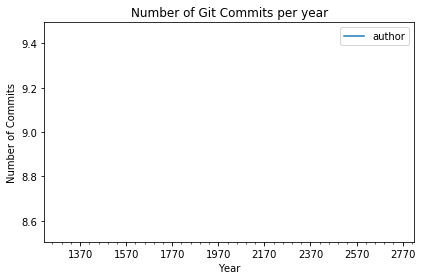

In [18]:
# Setting up plotting in Jupyter notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# plot the data
# ... YOUR CODE FOR TASK 8 ...
commits_per_year.plot()
plt.xlabel('Year')
plt.ylabel('Number of Commits')
plt.title('Number of Git Commits per year')
plt.tight_layout()
plt.show()

## 9.  Conclusion
<p>Thanks to the solid foundation and caretaking of Linux Torvalds, many other developers are now able to contribute to the Linux kernel as well. There is no decrease of development activity at sight!</p>

In [19]:
# calculating or setting the year with the most commits to Linux
year_with_most_commits = commits_per_year.nlargest(1,columns='author').index.strftime('%Y')

In [20]:
# calculating or setting the year with the most commits to Linux
year_with_most_commits = year_with_most_commits[0]